In [1]:
import pandas as pd
import torch
import torch_geometric
from torch_geometric.data import Dataset, Data
import numpy as np 
from torch_geometric.loader import DataLoader
import os
from torch_geometric.nn import Sequential, GCNConv,GATConv
import matplotlib.pyplot as plt
from torch.nn import Linear
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time
import MyData as data
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression

In [2]:
%%time
data_handler=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed')
fname='pi-_10GeV_4ly_1e-4ly_normalized_1e-4_viewx'

CPU times: user 13 µs, sys: 16 µs, total: 29 µs
Wall time: 47.2 µs


In [ ]:
data_trk=data_handler.get_more_file(0,500,fname)

In [5]:
data_handler2=data.dataset_preparation(root='/lustrehome/federicacuna/TB_Sept_2023_ml/Data/preprocessed')
fnameHN='pi-_10GeV_4ly_3e-4ly_normalized_viewx'

In [ ]:
dataHN=data_handler2.get_more_file(0,500,fnameHN)

In [18]:
train_dataset=(dataHN[:1800000]+data_trk[:2200000])
print(len(train_dataset))

4000000


In [10]:
data_val=data_handler.get_more_file(600,680,fname)

taking a list of file from  600  to  680


In [9]:
dataHN_val=data_handler2.get_more_file(600,680,fnameHN)

taking a list of file from  600  to  680


In [24]:
len(dataHN_val)

374647

In [19]:
y_values = [item for data in train_dataset for item in data.y.tolist()]
total_nodes = sum([len(data.y.tolist()) for data in train_dataset])
count_1 = y_values.count(1)/total_nodes
count_0 = y_values.count(0)/total_nodes
print(count_1)
print(count_0)

0.5052746104284794
0.4947253895715205


<BarContainer object of 2 artists>

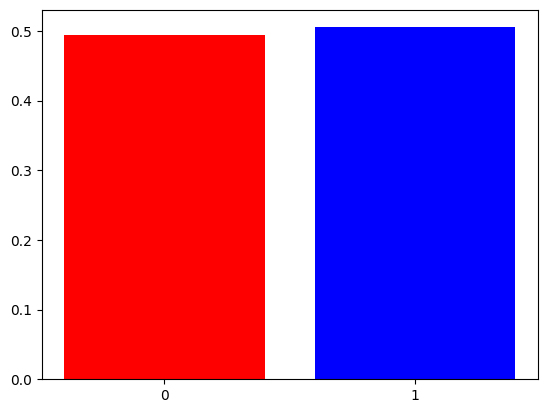

In [20]:
plt.bar(['0', '1'], [count_0, count_1], color=['red', 'blue'])

In [21]:
val_dataset=dataHN_val[:360000]+data_val[:440000]

In [22]:
len(val_dataset)

800000

In [23]:
y_values = [item for data in val_dataset for item in data.y.tolist()]
total_nodes = sum([len(data.y.tolist()) for data in val_dataset])
count_1 = y_values.count(1)/total_nodes
count_0 = y_values.count(0)/total_nodes
print(count_1)
print(count_0)

0.5041573554926035
0.49584264450739646


<BarContainer object of 2 artists>

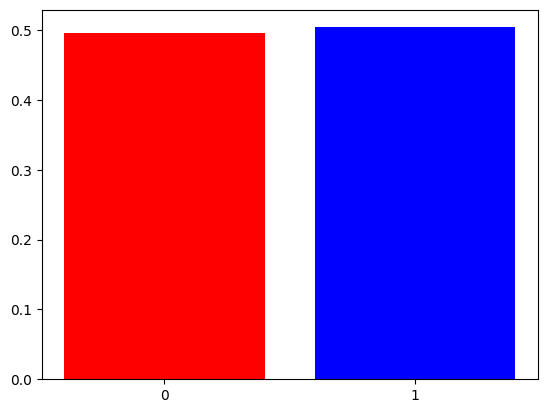

In [24]:
plt.bar(['0', '1'], [count_0, count_1], color=['red', 'blue'])